<h1 style="text-align:center;">Reinforcement Learning and Planning - Problems for Weeks 1-2</h1>

### Name and Surname: Moabi Mokhoro

### Student number: 22825584

In [48]:
# import statements
import numpy as np
import matplotlib.pyplot as plt
import random

# Question 1 - k-armed bandit problem

## (a) Histograms of rewards for each of the 3 levers

In [17]:
# (a)
R_0 = [] # rewards, action 0
R_1 = [] # rewards, action 1
R_2 = [] # rewards, action 2

N = 1000

for i in range(N):
    # generate ith reward for action 0
    r_0 = random.normalvariate(0, 1)
    R_0.append(r_0)
    # generate ith reward for action 1
    r_1 = random.normalvariate(1, 1)
    R_1.append(r_1)
    # generate ith reward for action 2
    r_2 = random.normalvariate(2, 1)
    R_2.append(r_2)

# plot the histograms of the rewards
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
# Rewards for action 0
axes[0].hist(R_0, bins=30, color='blue')
axes[0].set_title('Rewards - action 0')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')
# Rewards for action 1
axes[1].hist(R_1, bins=30, color='red')
axes[1].set_title('Rewards - action 1')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Frequency')
# Rewards for action 2
axes[2].hist(R_2, bins=30, color='green')
axes[2].set_title('Rewards - action 2')
axes[2].set_xlabel('Values')
axes[2].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# compare the means
print('The mean of rewards for action 0: ', sum(R_0)/N)
print('The mean of rewards for action 1: ', sum(R_1)/N)
print('The mean of rewards for action 2: ', sum(R_2)/N)

The mean of rewards for action 0:  -0.0638523799548615
The mean of rewards for action 1:  0.9977511299836798
The mean of rewards for action 2:  2.0374799495586235


## (b) Estimated Value function

In [49]:
# estimated value function
def value_function(A,R):
    ids_0 = np.where(A == 0)[0]
    ids_1 = np.where(A == 1)[0]
    ids_2 = np.where(A == 2)[0]
    value_0 = float('-inf') if len(ids_0) == 0 else np.mean(R[ids_0])
    value_1 = float('-inf') if len(ids_1) == 0 else np.mean(R[ids_1])
    value_2 = float('-inf') if len(ids_2) == 0 else np.mean(R[ids_2])

    value = np.array([value_0, value_1, value_2])

    return value
    

## (c) The $\epsilon-\text{greedy policy}$ function

In [50]:
N = 1000
# epsilon greedy policy function
def e_greedy(epsilon, N=1000):
    # possible actions
    actions = np.array([0,1,2])
    # probabilities of the actions at each step
    probs = [1-epsilon, epsilon/3,epsilon/3,epsilon/3]
    # initialize action and reward list
    a = 1
    r = random.normalvariate(a, 1)
    A = np.array([a])
    R = np.array([r])
    accumulated_rewards = [np.mean(R)]
    
    for i in range(1,N+1):
        # calculate the value function
        value_func = value_function(A,R)
        # action based on max value
        a_max = actions[np.argmax(value_func)]
        # actions to sample from
        candidate_actions = np.concatenate(([a_max], actions))
        # choose an action, obtain its reward 
        a = np.random.choice(candidate_actions, size=1, p=probs)
        r = random.normalvariate(a, 1)
        # append action, rewards, accumulated rewards list
        A = np.append(A, a)
        R = np.append(R, r)
        accumulated_rewards.append(np.mean(R))

    return accumulated_rewards
        
    


### The accumulated average reward for $\epsilon = 0,0.1,0.3$

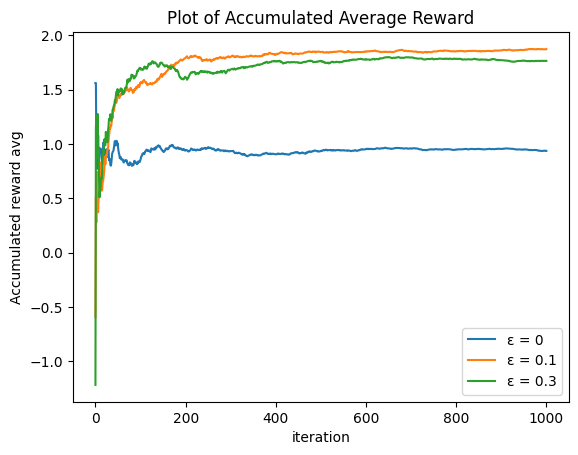

In [53]:
rewards_1 = e_greedy(0) 
rewards_2 = e_greedy(0.1) 
rewards_3 = e_greedy(0.3) 

# plot of accumulated avg rewards
plt.plot(rewards_1, label="\u03B5 = 0")
plt.plot(rewards_2, label="\u03B5 = 0.1")
plt.plot(rewards_3, label="\u03B5 = 0.3")
plt.xlabel('iteration')
plt.ylabel('Accumulated reward avg')
plt.title('Plot of Accumulated Average Reward')
plt.legend()
plt.show()

### Explanation of the results in the plot above

The accumulated average returns are lowest when using the greedy approach, where $\epsilon = 0$, whereby the is no exploration being done and the agent is not trying to discover better actions. The highest accumulated reward is obtained when the $\epsilon \text{-greedy}$ policy is being followed, as in this case the exploration is encouraged and the agent explores the actions as this has the potential to lead to a discovery of better policy with higher accumulated return compared to the greedy policy. Therefore, exploration seems to be preferable as compared to following a greedy policy. However, too much exploration seems to lead to a lower accumulated average reward, as $\epsilon = 0.1$ leads to a higher accumulated reward than $\epsilon = 0.3$. This is an indication of over-exploration when $\epsilon = 0.3$. 

## (d) Stochastic Approximation of the value function

In [54]:
# define epsilon greedy function
def e_greedy_annealing(epsilon, N=1000):
    # possible actions
    actions = np.array([0,1,2])
    # probabilities of the actions at each step
    probs = [1-epsilon, epsilon/3,epsilon/3,epsilon/3]
    # initialize the value function
    value_func = np.array([0,0,0])
    # initialize action and reward list
    a = 1 
    r = random.normalvariate(a, 1)
    A = np.array([a])
    R = np.array([r])
    accumulated_rewards = [np.mean(R)]

    for i in range(1,N+1):
        alpha = 1/i
        # calculate the value function
        value_func[a] = (1 - alpha)*value_func[a] + alpha*r
        # action based on max value
        a_max = actions[np.argmax(value_func)]
        # actions to sample from
        candidate_actions = np.concatenate(([a_max], actions))
        # choose an action, obtain its reward 
        a = np.random.choice(candidate_actions, size=1, p=probs)
        r = random.normalvariate(a, 1)
        # append action, rewards, accumulated rewards list
        A = np.append(A, a)
        R = np.append(R, r)
        accumulated_rewards.append(np.mean(R))

    return accumulated_rewards

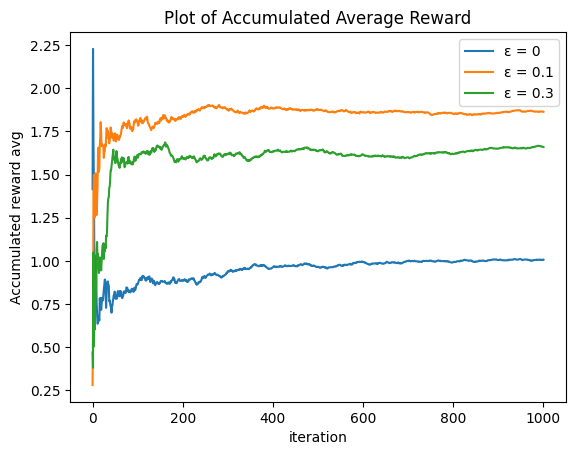

In [55]:
annealing_1 = e_greedy(0) 
annealing_2 = e_greedy(0.1) 
annealing_3 = e_greedy(0.3) 

# plot the accumulated rewards over time
plt.plot(annealing_1, label="\u03B5 = 0")
plt.plot(annealing_2, label="\u03B5 = 0.1")
plt.plot(annealing_3, label="\u03B5 = 0.3")
plt.xlabel('iteration')
plt.ylabel('Accumulated reward avg')
plt.title('Plot of Accumulated Average Reward')
plt.legend()
plt.show()

### Explanation of the results in the plot above

Similar to the results obtained in (c) above, exploration seems to be preferable as compared to following a greedy policy. However, too much exploration seems to lead to a lower accumulated average reward, as $\epsilon = 0.1$ leads to a higher accumulated reward than $\epsilon = 0.3$. This is an indication of over-exploration when $\epsilon = 0.3$. 

# Question 2 (Linear model: Markov reward process)

## (a)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# discount factors
gamma_values = np.around(np.arange(0, 1, 0.1), decimals=1)

# define the transition matrix
P = np.array([[0.6,0.4,0,0,0,0,0],
              [0.4,0.2,0.4,0,0,0,0],
              [0,0.4,0.2,0.4,0,0,0],
              [0,0,0.4,0.2,0.4,0,0],
              [0,0,0,0.4,0.2,0.4,0],
              [0,0,0,0,0.4,0.2,0.4],
              [0,0,0,0,0,0.4,0.6]])

# define the expected next reward for each state, p
p = np.array([1,0,0,0,0,0,10])
# obtain and plot the value function for each state
fig, ax = plt.subplots()
for gamm in gamma_values:
    # obtain the value function
    value_func = np.linalg.inv(np.eye(7) - gamm*P)@p
    # plot the value function
    ax.plot(value_func, label=f"\u03B3 = {gamm}")


ax.set_title("Value Function plot")
ax.set_xlabel("state")
ax.set_ylabel("v(s)")
ax.legend()
plt.show()

## (b)

The value functions of each state is given below. Each value function was obtained using the following equation:

$$
v(s) = \rho(s) + \gamma(Pv)(s)
$$

### s = 6

$ P = P( 6 \rightarrow j) = [0,0,0,0,0,0.4,0.6] $

$ v(s^{'}) = [ v(1), v(2), v(3), v(4), v(5), v(6) ] $

$ \rho(6) = E[R_{t+1} | S_{t} = 6] = 10*0.4 + 10*0.6 = 10$

$ v(6) = \rho(6) + Pv(s^{'}) = 10 + \gamma[0.4v(5) + 0.6v(6)] $

### s = 5

$ P = P( 5 \rightarrow j) = [0,0,0,0,0.4,0.2,0.4] $

$ v(s^{'}) = [ v(1), v(2), v(3), v(4), v(5), v(6) ] $

$ \rho(5) = 0 $

$ v(5) = \rho(5) + Pv(s^{'}) = 0 + \gamma[0.4v(4) + 0.2v(5) + 0.4v(6)] $

### s = 4

$ P = P( 4 \rightarrow j) = [0,0,0,0.4,0.2,0.4,0] $

$ v(s^{'}) = [ v(1), v(2), v(3), v(4), v(5), v(6) ] $

$ \rho(4) = 0 $

$ v(4) = \rho(4) + Pv(s^{'}) = 0 + \gamma[0.4v(3) + 0.2v(4) + 0.4v(5)] $

### s = 3

$ P = P( 3 \rightarrow j) = [0,0,0.4,0.2,0.4,0,0] $

$ v(s^{'}) = [ v(1), v(2), v(3), v(4), v(5), v(6) ] $

$ \rho(3) = 0 $

$ v(3) = \rho(3) + Pv(s^{'}) = 0 + \gamma[0.4v(2) + 0.2v(3) + 0.4v(4)]$

### s = 2

$ P = P( 2 \rightarrow j) = [0,0.4,0.2,0.4,0,0,0] $

$ v(s^{'}) = [ v(1), v(2), v(3), v(4), v(5), v(6) ] $

$ \rho(2) = 0 $

$ v(2) = \rho(2) + Pv(s^{'}) = 0 + \gamma[0.4v(1) + 0.2v(2) + 0.4v(3)]$

### s = 1

$ P = P( 1 \rightarrow j) = [0.4,0.2,0.4,0,0,0,0] $

$ v(s^{'}) = [ v(1), v(2), v(3), v(4), v(5), v(6) ] $

$ \rho(1) = 0 $

$ v(1) = \rho(1) + Pv(s^{'}) = 0 + \gamma[0.4v(0) + 0.2v(1) + 0.4v(2)]$


### s = 0

$ P = P( 0 \rightarrow j) = [0.6,0.4,0,0,0,0,0] $

$ v(s^{'}) = [ v(1), v(2), v(3), v(4), v(5), v(6) ] $

$ \rho(0) = 1*0.4 + 1*0.6 = 1 $

$ v(0) = \rho(0) + Pv(s^{'}) = 1 + \gamma[0.6v(0) + 0.4v(1)]$

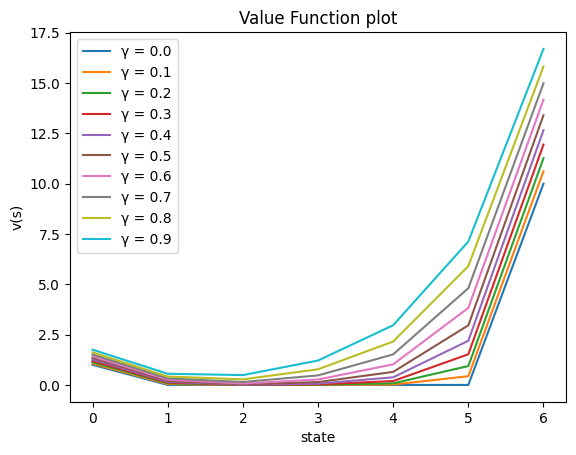

In [24]:
# discount factors
gamma_values = np.around(np.arange(0, 1, 0.1), decimals=1)
# define the expected next reward for each state, p
p = np.array([1,0,0,0,0,0,10])
# convergence threshold
threshold = 1e-6
# solving the linear Bellman equations iteratively
fig, ax = plt.subplots()
for gamm in gamma_values:
    # initialize the value functions
    v = np.full(7, 5)
    v_new = np.zeros(7)
    diff = abs(np.linalg.norm(v) - np.linalg.norm(v_new))
    while diff>threshold:
        v_new[6] = p[6] + gamm*(0.4*v_new[5] + 0.6*v_new[6]) 
        v_new[5] = p[5] + gamm*(0.4*v_new[4] + 0.2*v_new[5] + 0.4*v_new[6])
        v_new[4] = p[4] + gamm*(0.4*v_new[3] + 0.2*v_new[4] + 0.4*v_new[5])
        v_new[3] = p[3] + gamm*(0.4*v_new[2] + 0.2*v_new[3] + 0.4*v_new[4])
        v_new[2] = p[2] + gamm*(0.4*v_new[1] + 0.2*v_new[2] + 0.4*v_new[3])
        v_new[1] = p[1] + gamm*(0.4*v_new[0] + 0.2*v_new[1] + 0.4*v_new[2])
        v_new[0] = p[0] + gamm*(0.6*v_new[0] + 0.4*v_new[1]) 
        diff = abs(np.linalg.norm(v) - np.linalg.norm(v_new))
        v = v_new

    ax.plot(v, label=f"\u03B3 = {gamm}")

ax.set_title("Value Function plot")
ax.set_xlabel("state")
ax.set_ylabel("v(s)")
ax.legend()
plt.show()       

## (c)

In [47]:
# reward function
def reward_function(s, s_prime):
    if (s==0 and s_prime==1) or (s==0 and s_prime==0):
            reward = 1
    elif (s==6 and s_prime==5) or (s==6 and s_prime==6):
        reward = 10
    else:
        reward = 0

    return reward
    
# define N
N = 1000
# define the states
states = np.array([0,1,2,3,4,5,6])
# define the transition matrix
P = np.array([[0.6,0.4,0,0,0,0,0],
              [0.4,0.2,0.4,0,0,0,0],
              [0,0.4,0.2,0.4,0,0,0],
              [0,0,0.4,0.2,0.4,0,0],
              [0,0,0,0.4,0.2,0.4,0],
              [0,0,0,0,0.4,0.2,0.4],
              [0,0,0,0,0,0.4,0.6]])

# initial point
s = 1
# define the return 
accum_return = 0
# simulate a trajectory
for t in range(1, N+1):
    #sample new state
    s_prime = np.random.choice(states, p=P[s])
    # obtain the reward
    reward = reward_function(s,s_prime)
    # accumulate returns
    accum_returns += reward
    s = s_prime

print("The accumulated return: ", accum_returns)       

The accumulated return:  4122


## (d) The Estimated v(2)

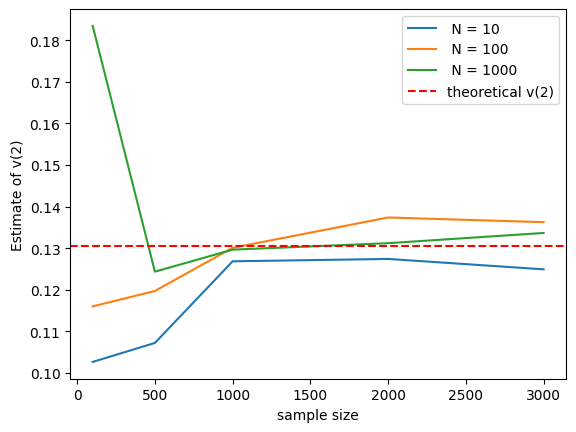

In [93]:
# states
states = np.array([0,1,2,3,4,5,6])
# transition matrix
P = np.array([[0.6,0.4,0,0,0,0,0],
              [0.4,0.2,0.4,0,0,0,0],
              [0,0.4,0.2,0.4,0,0,0],
              [0,0,0.4,0.2,0.4,0,0],
              [0,0,0,0.4,0.2,0.4,0],
              [0,0,0,0,0.4,0.2,0.4],
              [0,0,0,0,0,0.4,0.6]])

# function for estimating v(2)
def value_two(N,trajectory):
    # gamma value
    gamma = 0.5
    # list for discounted returns
    discounted_list = [] 
    # sample different trajectories
    for tr in range(trajectory):
        # start at s = 2
        s = 2
        # discounted returns 
        discounted_returns = 0
        for step in range(1, N+1):
            #sample new state
            s_prime = np.random.choice(states, p=P[s])
            # obtain the reward
            reward = reward_function(s,s_prime)
            discounted_returns += reward*(gamma**(step-1))
            s = s_prime

        discounted_list.append(discounted_returns)
        
    return sum(discounted_list)/trajectory

#  final times
final_times = [10,100,1000]
# number of trajectories
trajectories = [100,500,1000,2000,3000]
# estimates of v(2) for diff number of trajectories
estimate_v = np.zeros((3, 5))
# simulate trajectories and estimate v(2)
for n in final_times:
    for tr in trajectories:
        estimate_v[final_times.index(n), trajectories.index(tr)] = value_two(N=n,trajectory=tr)

# Plot each row with labels
for k in range(3):
    plt.plot(np.array([100,500,1000,2000,3000]),estimate_v[k], label=f" N = {final_times[k]}")

# Add legend
plt.xlabel('sample size')
plt.ylabel('Estimate of v(2)')
plt.axhline(y=0.1304331, color='red', linestyle='--', label='theoretical v(2)')
plt.legend()
plt.show()

# Question 3 - Linear Model: Markov decision process

## (a) The transition probabilities

### $p(s^{'} |s,a = 1)$

$$
\mathbf{P} = \begin{bmatrix}
0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{bmatrix}
$$


### $p(s^{'} |s,a = 0)$

$$
\mathbf{P} = \begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{bmatrix}
$$


## (b)

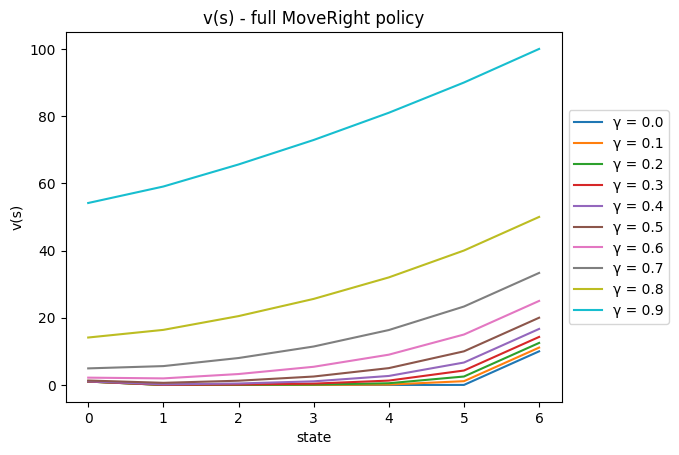

In [26]:
# transition matrix, MoveRight 
P_right = np.array([[0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0],
                  [0, 0, 0, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 1]])

# expected reward, MoveRight 
rho_right = np.array([1,0,0,0,0,0,10])
# discount factors
gamma_values = np.around(np.arange(0, 1, 0.1), decimals=1)
# obtain and plot the value function for each state
fig, ax = plt.subplots()
for gamm in gamma_values:
    # obtain the value function
    value_func = np.linalg.inv(np.eye(7) - gamm*P_right)@rho_right
    # plot the value function
    ax.plot(value_func, label=f"\u03B3 = {gamm}")
    # store the value function for gamma=0.5
    if gamm==0.5: value_right = value_func

ax.set_title("v(s) - full MoveRight policy")
ax.set_xlabel("state")
ax.set_ylabel("v(s)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [27]:
# transition matrix for full MoveLeft policy
P_left = np.array([[1, 0, 0, 0, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0]])

#expected reward for full MoveLeft policy
rho_left = np.array([1,0,0,0,0,0,10])
#discount factors
gamma_values = np.around(np.arange(0, 1, 0.1), decimals=1)
# obtain and plot the value function for each state
fig, ax = plt.subplots()
for gamm in gamma_values:
    # obtain the value function
    value_func = np.linalg.inv(np.eye(7) - gamm*P_left)@rho_left
    # plot the value function
    ax.plot(value_func, label=f"\u03B3 = {gamm}")
    # store the value function for gamma =0.5
    if gamm==0.5: value_left = value_func

ax.set_title("v(s) - full MoveLeft policy")
ax.set_xlabel("state")
ax.set_ylabel("v(s)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### The Linear Model for the random $\frac{1}{2}\text{MoveLeft} + \frac{1}{2}\text{MoveRight}$ policy:

<img src="mdp.jpeg" alt="image" width="800" height="700">


The transition matrix of this policy is:

$$
\mathbf{P} = \begin{bmatrix}
0.5 & 0.5 & 0 & 0 & 0 & 0 & 0 \\
0.5 & 0 & 0.5 & 0 & 0 & 0 & 0 \\
0 & 0.5 & 0 & 0.5 & 0 & 0 & 0 \\
0 & 0 & 0.5 & 0 & 0.5 & 0 & 0 \\
0 & 0 & 0 & 0.5 & 0 & 0.5 & 0 \\
0 & 0 & 0 & 0 & 0.5 & 0 & 0.5 \\
0 & 0 & 0 & 0 & 0 & 0.5 & 0.5 \\
\end{bmatrix}
$$


In [28]:
# transition matrix for random policy
P_random = np.array([[0.5, 0.5, 0, 0, 0, 0, 0],
                  [0.5, 0, 0.5, 0, 0, 0, 0],
                  [0, 0.5, 0, 0.5, 0, 0, 0],
                  [0, 0, 0.5, 0, 0.5, 0, 0],
                  [0, 0, 0, 0.5, 0, 0.5, 0],
                  [0, 0, 0, 0, 0.5, 0, 0.5],
                  [0, 0, 0, 0, 0, 0.5, 0.5]])

#expected reward for random policy
rho_random = np.array([1,0,0,0,0,0,10])
#discount factors
gamma_values = np.around(np.arange(0, 1, 0.1), decimals=1)
# obtain and plot the value function for each state
fig, ax = plt.subplots()
for gamm in gamma_values:
    # obtain the value function
    value_func = np.linalg.inv(np.eye(7) - gamm*P_random)@rho_random
    # plot the value function
    ax.plot(value_func, label=f"\u03B3 = {gamm}")
    # store the value function for gamma =0.5
    if gamm==0.5: v_random_be = value_func

ax.set_title("v(s) - random policy")
ax.set_xlabel("state")
ax.set_ylabel("v(s)")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Comparison of the results

The MoveRight policy has higher value function than the other policies for all states in this task. This goes higher as one goes from state 0 to state 6. This is expected because the maximum reward is obtained when transitioning out of state 6, and with the MoveRight action, compared to other actions, the agent always transitions to the right, towards state 6, and when in state 6, the agent stays there. The MoveLeft policy has higher value function for state 6, as the maximum reward is obtained when transitioning out of this state towards the left, it is followed by state 0 where the agent is encouraged to move to when using this policy, but the reward obtained when in this state and transitioning out of it, is much lower than the reward obtained when transitioning out of state 6. And lastly, the random policy has a higher value function for state 6, where the maximum reward is obtained when transition out of this state, and the value function increases as the agent moves towards this state. Therefore, moving right seems to be the optimal policy, as compared to moving to the left.

## (c) Bellman optimality equation for $\text{v}_{*}(s)$

The Bellman optimality equation is:
$$
\text{v}_{*}(s) = \max\limits_{a}\rho(s,a) + \gamma \sum_{s^{'}}\text{v}_{*}(s^{'})p(s^{'}|s,a)
$$

where $a$ is either $0$ for MoveLeft policy, or $1$ for the MoveRight policy

The Bellman optimality equations for the seven states in this task are given below:

### s=0

\begin{align*}
v_{*}(s=0) &= \max\limits_{a}\left(\rho(s=0,a) + \gamma \sum_{s'}v_{*}(s')p(s'|s=0,a)\right) \\
&= \max\left(\rho(s=0,a=0) + \gamma v_{*}(s'=0)p(s'=0|s=0,a=0),\rho(s=0,a=1) + \gamma v_{*}(s'=1)p(s'=1|s=0,a=1) \right) \\
&= \max\left( 1 + \gamma v_{*}(s'=0)*1 ,  1 + \gamma v_{*}(s'=1)*1 \right) \\
&= \max\left( 1 + \gamma v_{*}(s'=0) ,  1 + \gamma v_{*}(s'=1) \right)
\end{align*}

### s=6

\begin{align*}
v_{*}(s=6) &= \max\limits_{a}\left(\rho(s=6,a) + \gamma \sum_{s'}v_{*}(s')p(s'|s=6,a)\right) \\
&= \max\left(\rho(s=6,a=0) + \gamma v_{*}(s'=5)p(s'=5|s=6,a=0),\rho(s=6,a=1) + \gamma v_{*}(s'=6)p(s'=6|s=6,a=1) \right) \\
&= \max\left( 10 + \gamma v_{*}(s'=5)*1 ,  10 + \gamma v_{*}(s'=6)*1 \right) \\
&= \max\left( 10 + \gamma v_{*}(s'=5) ,  10 + \gamma v_{*}(s'=6) \right)
\end{align*}

### s=i, for $\text{i}={1,2,3,4,5}$

\begin{align*}
v_{*}(s=i) &= \max\limits_{a}\left(\rho(s=i,a) + \gamma \sum_{s'}v_{*}(s')p(s'|s=i,a)\right) \\
&= \max\left(\rho(s=i,a=0) + \gamma v_{*}(s'=i-1)p(s'=i-1|s=i,a=0),\rho(s=i,a=1) + \gamma v_{*}(s'=i+1)p(s'=i+1|s=i,a=1) \right) \\
&= \max\left( 0 + \gamma v_{*}(s'=i-1)*1 ,  0 + \gamma v_{*}(s'=i+1)*1 \right) \\
&= \max\left( 0 + \gamma v_{*}(s'=i-1) ,  0 + \gamma v_{*}(s'=i+1) \right) \\
&= \max\left(\gamma v_{*}(s'=i-1) , \gamma v_{*}(s'=i+1) \right) 
\end{align*}

## (d) Synchronous Updating

The optimal (deterministic) policy for each state:  [0. 0. 1. 1. 1. 1. 1.]


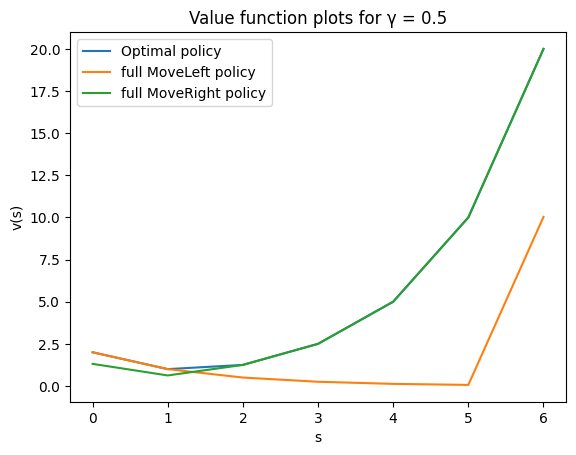

In [34]:
# initial value function, and optimal policy
v =  np.zeros(7)
v_new =np.full(7,1)
optimal_policy = np.zeros(7)
threshold = abs(np.linalg.norm(v) - np.linalg.norm(v_new))
# define the gamma value
gamma = 0.5
# define the rho vector
rho = np.array([1,0,0,0,0,0,10])

# iterate to obtain optimal value function
while threshold>1e-6:
    v_new = np.copy(v)
    # s=0
    v_new[0] = np.max([rho[0] + gamma*v[0], rho[0] + gamma*v[1]])
    optimal_policy[0]  = np.argmax([rho[0] + gamma*v[0], rho[0] + gamma*v[1]])
    # the other states
    for i in range(1,6):
        v_new[i] = np.max([rho[i] + gamma*v[i-1], rho[i] + gamma*v[i+1]] )
        optimal_policy[i]  = np.argmax([rho[i] + gamma*v[i-1], rho[i] + gamma*v[i+1]] )
        
    # s= 6
    v_new[6] = np.max([rho[6] + gamma*v[5], rho[6] + gamma*v[6]])
    optimal_policy[6]  = np.argmax([rho[6] + gamma*v[5], rho[6] + gamma*v[6]])
    # monitor convergence
    threshold = abs(np.linalg.norm(v) - np.linalg.norm(v_new))
    v = v_new

# optimal policy
print('The optimal (deterministic) policy for each state: ', optimal_policy)

# plot of the value functions for each policy
plt.plot(range(7),v, label='Optimal policy')
plt.plot(range(7),value_left, label='full MoveLeft policy')
plt.plot(range(7),value_right, label='full MoveRight policy')
plt.xlabel('s')
plt.ylabel('v(s)')
plt.legend()
plt.title('Value function plots for \u03B3 = 0.5')
plt.show()

### Comparison of results

The Optimal policy value function seems to be similar to the MoveRight policy, especially for states 2 to 6. This value function for this 4 states is much higher than that of the MoveLeft policy. The Optimal policy also has a similar value function to the MoveLeft policy for states 0 and 1, and this is slightly higher than that of the MoveRight policy for these two states. This indicates that the Optimal policy leads to a value function which is a maximum over the two policies being considered, which are MoveRight and MoveLeft. Additionally, the maximum reward is obtained when transitioning out of state 6, and the MoveRight policy encourages the agent to move towards this state, which explains why the value function increases when going from state 0 to state 6. On the other hand, the MoveLeft policy, has a lower value function as it encourages the agent to move towards the left, where the agent stays, and picks up a much lower reward.

## (e) (Optional) Asynchronous updating



The optimal (deterministic) policy for each state:  [0. 0. 1. 1. 1. 1. 1.]


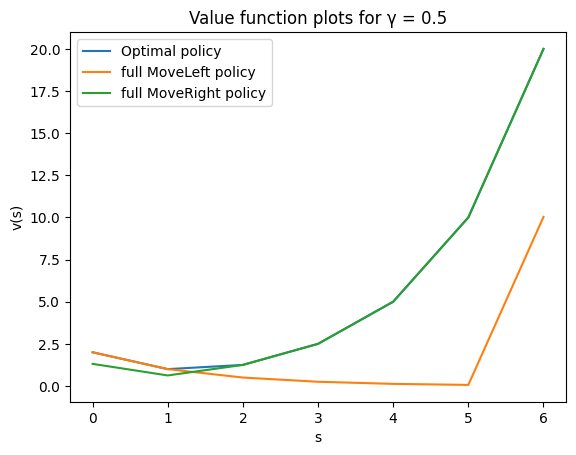

In [36]:
## initialize thev value function, and optimaly policy vector
v = np.zeros(7)
optimal_policy = np.zeros(7)
iteration = 0
norm = 5 # norm to monitor convergence
threshold = 5
#define the gamma value
gamma = 0.5
# define the rho vector
rho = np.array([1,0,0,0,0,0,10])

# iterate to obtain optimal value function

while threshold>1e-6:
    # s=0
    v[0] = np.max([rho[0] + gamma*v[0], rho[0] + gamma*v[1]])
    optimal_policy[0]  = np.argmax([rho[0] + gamma*v[0], rho[0] + gamma*v[1]])
    # the other states
    for i in range(1,6):
        v[i] = np.max([rho[i] + gamma*v[i-1], rho[i] + gamma*v[i+1]] )
        optimal_policy[i]  = np.argmax([rho[i] + gamma*v[i-1], rho[i] + gamma*v[i+1]] )
        
    # s= 6
    v[6] = np.max([rho[6] + gamma*v[5], rho[6] + gamma*v[6]])
    optimal_policy[6]  = np.argmax([rho[6] + gamma*v[5], rho[6] + gamma*v[6]])
    # monitor convergence
    norm_new = np.linalg.norm(v)
    threshold = abs(norm_new - norm)
    norm = norm_new

# optimal policy
print('The optimal (deterministic) policy for each state: ', optimal_policy)

# plot of the value functions for each policy
plt.plot(range(7),v, label='Optimal policy')
plt.plot(range(7),value_left, label='full MoveLeft policy')
plt.plot(range(7),value_right, label='full MoveRight policy')
plt.xlabel('s')
plt.ylabel('v(s)')
plt.legend()
plt.title('Value function plots for \u03B3 = 0.5')
plt.show()

## (f) The Impact of the Stay policy on the Optimal value function

The Stay policy will not change the optimal policy because with this policy, the value function will be highest at state 6 and equal to the value function for MoveRight, this will be followed by state 1 (equal to the value function for MoveLeft), and it will be 0 for the rest of the states. And since the optimal policy value function is the maximum of the value functions of the actions under consideration, the resulting optimal value function when putting the Stay policy into consideration will not change. Similarly, the optimal value function would not change if moves from state 3 to state 6 were added. However, the value function of this policy would be higher for states 3 to 6 for this policy compared to the stay policy. This is expected as the agent has a chance of transitioning to state 6, which yeilds highest reward when transitioning out of.

This is illustrated in the plot given below.

In [62]:
P_3_6 = np.array([[1, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0.5, 0.5, 0, 0],
              [0, 0, 0, 0, 0.5, 0.5, 0],
              [0, 0, 0, 0, 0, 0.5, 0.5],
              [0, 0, 0, 0, 0, 0, 1]])
P_stay = np.array([[1, 0, 0, 0, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 1]])

rho = np.array([1, 0, 0, 0, 0, 0,10])
# obtain and plot the value function for each state
value_stay = np.linalg.inv(np.eye(7) - 0.5*P_stay)@rho
value_3_6 = np.linalg.inv(np.eye(7) - 0.5*P_3_6)@rho
plt.plot(value_stay, label="Stay policy")
plt.plot(value_3_6, label="Moves 3-6 added")
plt.plot(v, label='Optimal policy')
plt.title("v(s) - Stay policy")
plt.xlabel("state")
plt.ylabel("v(s)")
plt.legend()
plt.show()

# Question 4 Linear Model: Temporal difference

## (a) TD(0) Algorithm

In [43]:
# transition matrix for random policy
P_random = np.array([[0.5, 0.5, 0, 0, 0, 0, 0],
                  [0.5, 0, 0.5, 0, 0, 0, 0],
                  [0, 0.5, 0, 0.5, 0, 0, 0],
                  [0, 0, 0.5, 0, 0.5, 0, 0],
                  [0, 0, 0, 0.5, 0, 0.5, 0],
                  [0, 0, 0, 0, 0.5, 0, 0.5],
                  [0, 0, 0, 0, 0, 0.5, 0.5]])

states = np.array([0,1,2,3,4,5,6])
# initial value function
v_random_td = np.full(7,30)
# parameters
alpha = 0.1
episodes = 1000
time_steps = 1000
gamma = 0.5

for episode in range(episodes):
    # initialize s
    s = random.choice(states)

    for step in range(time_steps):
        s_prime = np.random.choice(states, p=P_random[s])
        # obtain the reward
        reward = reward_function(s,s_prime)
        # update the value function
        v_random_td[s] = v_random_td[s] + alpha*(reward + gamma*v_random_td[s_prime] - v_random_td[s])
        s = s_prime
        
# plot
plt.plot(v_random_be, label='BE')
plt.plot(v_random_td, label='TD(0)')
plt.xlabel('s')
plt.ylabel('v(s)')
plt.title('Value function plot')
plt.legend()
plt.show()

The value function obtained above using the TD(0) algorithm is lower than the one obtained by solving the linear Bellman equation

## (b) Sarsa Algorithm

In [44]:
# transition matrices for the MoveLeft and MoveRight policies
P_right = np.array([[0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0],
                  [0, 0, 0, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 1]])

P_left = np.array([[1, 0, 0, 0, 0, 0, 0],
                  [1, 0, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 1, 0, 0, 0, 0],
                  [0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0]])

# define states and actions
states = np.array([0,1,2,3,4,5,6])
actions = np.array([0,1])
# initialize Q(S,A)
Q = np.zeros((7, 2))
# parameters
gamma = 0.5
alpha = 0.2
epsilon = 0.1
episodes = 1000
time_steps = 1000
#e-greedy probabilities
prob = np.array([1-epsilon, 0.5*epsilon, 0.5*epsilon]) 

for episode in range(episodes):
    # initialize s
    s = random.choice(states)
    # choose action using epsilon-greedy
    a_max = np.argmax(Q[s]) # greedy action 
    candidate_actions = np.insert(actions, 0, a_max)
    a = np.random.choice(candidate_actions, p=prob)

    for step in range(time_steps):
        # get s_prime, reward based on chosen action
        if a==0:
            s_prime = np.random.choice(states, p=P_left[s]) # MoveLeft choice
        else:
            s_prime = np.random.choice(states, p=P_right[s]) # MoveRight choice
        # obtain the reward
        reward = reward_function(s,s_prime)
        # obtain a_prime for s_prime using epsilon- greedy approach
        a_prime_max = np.argmax(Q[s_prime]) # greedy action 
        candidate_actions = np.insert(actions, 0, a_prime_max)
        a_prime = np.random.choice(candidate_actions, p=prob)
        # update the state-action value function
        Q[s,a] = Q[s,a] + alpha*(reward + gamma*Q[s_prime,a_prime] - Q[s,a])
        s = s_prime
        a = a_prime
        
# print the estimated Q(S,A) and policy
print('The state-action value function matrix: \n', Q)
optimal_policy = np.argmax(Q, axis=1)
print('The optimal policy : ', optimal_policy)
        

The state-action value function matrix: 
 [[ 1.94094877  1.42409781]
 [ 0.96023379  0.55280845]
 [ 0.47235449  1.11582071]
 [ 0.50636727  2.32311008]
 [ 1.0031943   4.32462036]
 [ 2.25097699  9.58305175]
 [14.7912408  19.73464521]]
The optimal policy :  [0 0 1 1 1 1 1]


## (c) Q-learning algorithm

In [45]:
# initialize Q(S,A)
Q = np.zeros((7, 2))

for episode in range(episodes):
    # initialize s
    s = random.choice(states)

    for step in range(time_steps):
        # choose action using epsilon-greedy
        a_max = np.argmax(Q[s]) # greedy action 
        candidate_actions = np.insert(actions, 0, a_max)
        a = np.random.choice(candidate_actions, p=prob)
        # get s_prime, reward based on chosen action
        if a==0:
            s_prime = np.random.choice(states, p=P_left[s]) # MoveLeft 
        else:
            s_prime = np.random.choice(states, p=P_right[s]) # MoveRight 
        # obtain the reward
        reward = reward_function(s,s_prime)
        # obtain max_a Q(s_prime,a)
        q_max = np.max(Q[s_prime])
        # update the state-action value function
        Q[s,a] = Q[s,a] + alpha*(reward + gamma*q_max - Q[s,a])
        s = s_prime
        
# print the estimated Q(S,A) and policy
print('The state-action value function: \n', Q)
optimal_policy = np.argmax(Q, axis=1)
print('The estimated optimal policy: ', optimal_policy)
        

The state-action value function: 
 [[ 2.          1.5       ]
 [ 1.          0.625     ]
 [ 0.5         1.25      ]
 [ 0.62358315  2.5       ]
 [ 1.25        5.        ]
 [ 2.5        10.        ]
 [15.         20.        ]]
The estimated optimal policy:  [0 0 1 1 1 1 1]


## (d) The difference between Sarsa and Q-learning

The Sarsa algortihm uses the $\epsilon \text{-greedy}$ policy to obtain the action at the next step, and this encourages exploration. This action is then used to update the state-action value function of the current state and current action. This makes the Sarsa algoithm off-policy when choosing the action to be taken at the next time step. On the other hand, the Q-learning algorithm uses the greedy approach to obtain the action at the next time step, and therefore does not do any exploration. This action is also used to update the state-value function for the current state and current action. This makes Q-learning algortihm on-policy when choosing the next action, as it chooses the action which maximizes the state-action value function.

# Question 5 Gridworld 

In [40]:
# policies
policy_north = np.array([0, 21, 2, 13, 4, 0, 1, 2, 3, 4, 5, 6, 7, 8,  
                      9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
policy_south = np.array([5, 21, 7, 13, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19, 20, 21, 22, 23, 24, 20, 21, 22, 23, 24])
policy_east = np.array([1, 21, 3, 13, 4, 6, 7, 8, 9, 9, 11, 12, 13,
                    14, 14, 16, 17, 18, 19, 19, 21, 22, 23, 24, 24])
policy_west = np.array([0, 21, 1, 13, 3, 5, 5 , 6, 7, 8, 10, 10, 11,
                    12, 13, 15, 15, 16, 17, 18, 20, 20, 21, 22, 23])
# define actions and states
actions = np.array([0,1,2,3])
states = np.arange(25)
# rewards
rho = np.zeros(25)
rho[1] = 10
rho[3] = 5
# define the parameters
gamma = 0.9
epsilon = 0.1
alpha = 0.2
#e-greedy probabilities
prob = np.array([1-epsilon, 0.25*epsilon, 0.25*epsilon,0.25*epsilon, 0.25*epsilon]) 

# initialize Q(S,A)
Q = np.zeros((len(states), len(actions)))

for episode in range(episodes):
    # initialize s
    s = random.choice(states)

    for step in range(time_steps):
        # choose action using epsilon-greedy
        a_max = np.argmax(Q[s]) # greedy action 
        candidate_actions = np.insert(actions, 0, a_max)
        a = np.random.choice(candidate_actions, p=prob)
        # get s_prime, reward based on chosen action
        if a==0:
            s_prime = policy_north[s] # MoveNorth 
        elif a==1:
            s_prime = policy_south[s] # MoveSouth 
        elif a==2:
            s_prime = policy_east[s] # MoveEast 
        else:
            s_prime = policy_west[s] # MoveWest 
        # obtain reward
        if (s==1 and s_prime==21):
            reward = 10
        elif (s==3 and s_prime==13):
            reward = 5
        elif s==s_prime:
            reward = -1
        else:
            reward = 0

        # obtain max_a Q(s_prime,a)
        q_max = np.max(Q[s_prime])
        # update the state-action value function
        Q[s,a] = Q[s,a] + alpha*(reward + gamma*q_max - Q[s,a])
        s = s_prime
        
# print the estimated Q(S,A) and policy
print('The state-action value function: \n', Q)
optimal_policy = np.argmax(Q, axis=1)
print('The optimal policy : ', optimal_policy)
        

The estimated state-action value function matrix: 
 [[18.77844771 17.80176308 21.97748529 18.7766659 ]
 [24.4194281  24.4194281  24.4194281  24.4194281 ]
 [18.77973676 17.80176308 17.47748529 21.97748529]
 [19.4194281  19.34786352 19.40673875 19.4071691 ]
 [10.8159193  11.26956763 13.42901875 17.47748529]
 [19.77973676 16.02158677 19.77973676 16.80176308]
 [21.97748529 17.80176308 17.80176308 17.80176308]
 [19.77973676 16.02158677 16.02158677 19.77973676]
 [17.47744416 14.41872926 14.15672471 17.80176308]
 [15.72973676  9.31481004  7.76769419 10.77163322]
 [17.80176308 14.4194281  17.80176308 15.02158677]
 [19.77973676 16.02158677 16.02158677 16.02158677]
 [17.80176308 14.4194281  14.4194281  17.80176308]
 [16.02158677 12.97705028 12.74056395 16.0186932 ]
 [14.15676308  7.57866437  5.50938287  9.69446972]
 [16.02158677 12.97748529 16.02158677 13.4194281 ]
 [17.80176308 14.4194281  14.4194281  14.4194281 ]
 [16.02158677 12.97748529 12.97748529 16.02158677]
 [14.4194281   9.22900903 10.3

## The optimal value function and policy

In [42]:
# print the optimal policy and value function
v_optimal = np.max(Q, axis=1)
v_optimal = np.reshape(v_optimal, (5, 5))
print('The optimal value function: \n', v_optimal)
actions_map = {0: 'north', 1:'south', 2: 'east', 3:'west'}
optimal_policy = np.reshape(optimal_policy, (5, 5))
optimal_policy = np.vectorize(actions_map.get)(optimal_policy)
print('The optimal policy: \n', optimal_policy)

The optimal value function: 
 [[21.97748529 24.4194281  21.97748529 19.4194281  17.47748529]
 [19.77973676 21.97748529 19.77973676 17.80176308 15.72973676]
 [17.80176308 19.77973676 17.80176308 16.02158677 14.15676308]
 [16.02158677 17.80176308 16.02158677 14.4194281  12.74107389]
 [14.4194281  16.02158677 14.4194281  12.97748529 11.67970771]]
The optimal policy: 
 [['east' 'north' 'west' 'north' 'west']
 ['north' 'north' 'north' 'west' 'north']
 ['north' 'north' 'north' 'north' 'north']
 ['north' 'north' 'north' 'north' 'north']
 ['north' 'north' 'north' 'north' 'west']]


The optimal value function obtained above is similar to the optimal value function found in Sutto & Barto p.65. The optimal policy given above only prints one of the optimal actions for each state, as compared to the one found in Sutton & Barto, where all the optimal actions for each state are given.